# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



**1) Write a function**

In [0]:
def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):
  prior = prob_drunk_prior
  conditional = 1.0
  marginal =  (conditional * prior) + (false_positive_rate * (1-prior))
  posterior = conditional * prior / marginal
  return posterior

What is the probability that a person is drunk after one positive breathalyzer test?

In [92]:
prob_drunk_given_positive(0.001, 0.08)

0.012357884330202669

What is the probability that a person is drunk after two positive breathalyzer tests?

In [93]:
prob_drunk_given_positive(prob_drunk_given_positive(0.001, 0.08), 0.08)

0.13525210993291495

How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

In [94]:
prob_drunk_prior = 0.001
false_positive_rate = 0.08
confidence_level = 0.95
test_count = 0
while (prob_drunk_prior < confidence_level):
  prob_drunk_prior = prob_drunk_given_positive(prob_drunk_prior, false_positive_rate)
  test_count += 1
print("prob_drunk_prior:", prob_drunk_prior)
print("test_count:", test_count)

prob_drunk_prior: 0.9606895076105054
test_count: 4


**2) Explore scipy.stats.bayes_mvs**

In [0]:
import numpy as np
from scipy.stats import t
from scipy.stats import bayes_mvs
import seaborn as sns 
from matplotlib import pyplot as plt

In [96]:
data1 = np.random.binomial(n=1, p=.5, size=10)

# sample size
n = len(data1)
# degrees of freedom
dof = n-1
# mean
mean = np.mean(data1)
# sample std
sample_std = np.std(data1, ddof=1)
# standard error
std_eror = sample_std/n**.5

freq_CI_1 = t.interval(0.95,dof,loc=mean,scale=std_eror)
print(freq_CI_1)
bayes_CI_1 = bayes_mvs(data1)[0][1]
print(bayes_CI_1)

(0.030591282220162996, 0.769408717779837)
(0.10065391160678222, 0.6993460883932178)


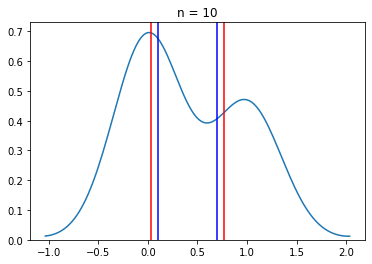

In [97]:
sns.kdeplot(data1)
plt.title("n = 10")
plt.axvline(x=freq_CI_1[0], color='r')
plt.axvline(x=freq_CI_1[1], color='r');
plt.axvline(x=bayes_CI_1[0], color='b')
plt.axvline(x=bayes_CI_1[1], color='b');

In [98]:
data2 = np.random.binomial(n=1, p=.5, size=100)

# sample size
n = len(data2)
# degrees of freedom
dof = n-1
# mean
mean = np.mean(data2)
# sample std
sample_std = np.std(data2, ddof=1)
# standard error
std_eror = sample_std/n**.5

freq_CI_2 = t.interval(0.95,dof,loc=mean,scale=std_eror)
print(freq_CI_2)
bayes_CI_2 = bayes_mvs(data2)[0][1]
print(bayes_CI_2)

(0.4406089327527315, 0.6393910672472686)
(0.4568296345231153, 0.6231703654768848)


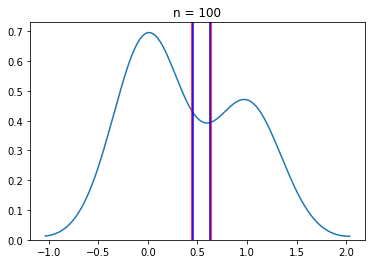

In [103]:
sns.kdeplot(data1)
plt.title("n = 100")
plt.axvline(x=freq_CI_2[0], color='r')
plt.axvline(x=freq_CI_2[1], color='r');
plt.axvline(x=bayes_CI_2[0], color='b')
plt.axvline(x=bayes_CI_2[1], color='b');

In [100]:
data3 = np.random.binomial(n=1, p=.5, size=1000)

# sample size
n = len(data3)
# degrees of freedom
dof = n-1
# mean
mean = np.mean(data3)
# sample std
sample_std = np.std(data3, ddof=1)
# standard error
std_eror = sample_std/n**.5

freq_CI_3 = t.interval(0.95,dof,loc=mean,scale=std_eror)
print(freq_CI_3)
bayes_CI_3 = bayes_mvs(data3)[0][1]
print(bayes_CI_3)

(0.4559676261260698, 0.5180323738739302)
(0.4609642200759049, 0.5130357799240951)


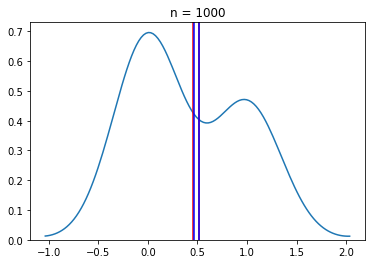

In [101]:
sns.kdeplot(data1)
plt.title("n = 1000")
plt.axvline(x=freq_CI_3[0], color='r')
plt.axvline(x=freq_CI_3[1], color='r');
plt.axvline(x=bayes_CI_3[0], color='b')
plt.axvline(x=bayes_CI_3[1], color='b');

**3) In your own words, summarize the difference between Bayesian and Frequentist statistics**

With the frequentist approach you immediately start with an assumption about your data. Given this assumption, you generate a model of the world which estimates all possibilities and their likelihoods. You then calculate how likely it would be to draw this data if this model, and your assumption by implication happened to be true. If the model implies it highly inlikely to have generated such data, then you reject your initial assumption. Otherwise, you keep the assumption.

With Bayesian approach, your goal is to state your confidence in a certain value which is a probability estimate of a certain value given the data available to you. You begin by stating your prior assumption of the likelihood of the value regardless of your available data. You calculate how likely you be to draw this data if your value was true. Finally, you state the probability how likely you be to draw this data, regardless if your value was true. Given these esteimates, you are able to calculate the probability of your value being true given your data.

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!